# Clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
quality.head()

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare,encoded_Combination
0,0,0,18,1,731.0,10,18,21,93,222,0,0,0
1,1,1,6,1,411.0,0,8,27,19,115,1,0,0
2,0,0,5,3,731.0,10,5,16,27,148,5,0,0
3,0,1,19,0,158.0,34,20,14,59,242,0,0,0
4,8,2,19,3,449.0,10,29,24,51,204,0,0,0


In [ ]:
quality=quality.drop(['PoorCare'],axis="columns")

In [ ]:
quality

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,encoded_Combination
0,0,0,18,1,731.000000,10,18,21,93,222,0,0
1,1,1,6,1,411.000000,0,8,27,19,115,1,0
2,0,0,5,3,731.000000,10,5,16,27,148,5,0
3,0,1,19,0,158.000000,34,20,14,59,242,0,0
4,8,2,19,3,449.000000,10,29,24,51,204,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,1,5,3,444.000000,0,7,11,11,36,0,0
127,1,0,3,2,731.000000,0,4,35,18,106,2,0
128,15,11,5,9,180.958333,95,31,56,43,265,3,0
129,0,2,14,1,216.958333,5,16,26,41,138,1,0


In [ ]:
quality.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_quality=scaler.fit_transform(quality)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

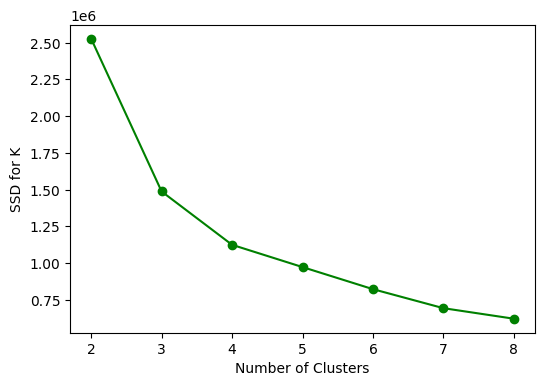

In [ ]:
#elbow method to find out optimal number of clusters
from sklearn.cluster import KMeans
ssd=[]
for k in range (2,9):
  kmeans_model=KMeans(n_clusters=k)
  kmeans_model.fit(quality)
  ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(2,9),ssd,color="green",marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSD for K")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_quality=scaler.fit_transform(quality)

In [ ]:
kmeans_model=KMeans(n_clusters=4)
clusters=kmeans_model.fit_predict(scaled_quality)
quality.insert(quality.columns.get_loc('InpatientDays'),"Cluster",clusters)
quality

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,encoded_Combination
0,3,0,0,18,1,731.000000,10,18,21,93,222,0,0
1,0,1,1,6,1,411.000000,0,8,27,19,115,1,0
2,0,0,0,5,3,731.000000,10,5,16,27,148,5,0
3,3,0,1,19,0,158.000000,34,20,14,59,242,0,0
4,3,8,2,19,3,449.000000,10,29,24,51,204,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,1,1,5,3,444.000000,0,7,11,11,36,0,0
127,0,1,0,3,2,731.000000,0,4,35,18,106,2,0
128,1,15,11,5,9,180.958333,95,31,56,43,265,3,0
129,3,0,2,14,1,216.958333,5,16,26,41,138,1,0


In [ ]:
quality['Cluster'].value_counts()

Cluster
0    73
3    44
1    13
2     1
Name: count, dtype: int64